In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from global_land_mask import globe
import scipy.stats as stats
import os
import importlib
import geopandas as gpd
from tqdm import tqdm
from scipy.fft import fftshift

# file containing functions:
import loadquakes
importlib.reload(loadquakes)
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202201.GLO.RL06M.MSCNv02CRI.nc")

ERROR 1: PROJ: proj_create_from_database: Open of /home/amand4/anaconda3/envs/syamsul_2023/share/proj failed


In [116]:
import geopandas as gpd

def grace_snapshot(lat,lon,title,fs,snapshot,ax,cb,loc,pad,fract):
    world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    vm=25
    
    ax.plot(lon,lat,'o', markeredgecolor='black', markerfacecolor='None', markersize=10)
    ax.plot(lon,lat,'o', markeredgecolor='black', markerfacecolor='None', markersize=15)
    
    lonshift = np.array(ds.lon)
    lonshift[lonshift>180] = lonshift[lonshift>180] - 360
    lat = np.array(ds.lat)
    c=ax.pcolormesh(fftshift(lonshift),lat,fftshift(snapshot,axes=1),vmin=-vm,vmax=vm,cmap='coolwarm')
    world.plot(color='none', edgecolor='black',ax=ax,alpha=0.5)
    
    ax.set_title(title, fontsize=fs)
    ax.grid()
    
    if cb:
        plt.colorbar(c, ax=ax, label='Surface load (cm-we)',fraction=fract, pad=pad,location=loc)
    return c

## GRACE PCA snapshots of significant events

#### M7.8 (April 2015) — Gorkha

In [68]:
dataset=ds.time.to_numpy()
index = np.where(dataset == np.datetime64('2015-04-27T00:00:00.000000000'))
print(index)
ds.time.to_numpy()[index]

(array([144]),)


array(['2015-04-27T00:00:00.000000000'], dtype='datetime64[ns]')

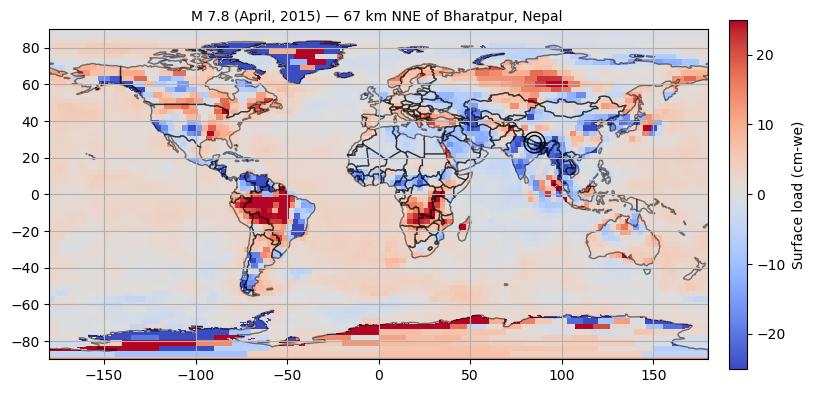

In [112]:
plt.style.use('default')

snapshot = ds.lwe_thickness.to_numpy()[index,:,:].squeeze()
fig,ax = plt.subplots(figsize=(9,9))

grace_snapshot(28.23,84.731,'M 7.8 (April, 2015) — 67 km NNE of Bharatpur, Nepal ',10,snapshot,ax,True,'right',pad=0.03,fract=0.025)

### Earthquakes with largest relative conditional probability

In [6]:
'''
Event 1 with cp = 11.91
'''

ds.sel(time='2005-06-01T12:00:00.000000000', method="nearest")

<xarray.Dataset>
Dimensions:        (lon: 720, lat: 360, bounds: 2)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
    time           datetime64[ns] 2005-06-16
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (lat, lon) float64 -2.731 -2.731 -2.731 ... 3.401 3.401 3.401
    uncertainty    (lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 ...
    lon_bounds     (lon, bounds) float64 ...
    time_bounds    (bounds) datetime64[ns] ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06Mv2 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2022-03-08T07:03:58Z

In [7]:
index = np.where(dataset == np.datetime64('2005-06-16T00:00:00.000000000'))
print(index)
snapshot1 = ds.lwe_thickness.to_numpy()[index,:,:].squeeze()

(array([35]),)


In [8]:
'''
Event 2 with cp = 11.91
'''

ds.sel(time='2003-08-18T12:00:00.000000000', method="nearest")

<xarray.Dataset>
Dimensions:        (lon: 720, lat: 360, bounds: 2)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
    time           datetime64[ns] 2003-08-16T12:00:00
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (lat, lon) float64 -0.603 -0.603 -0.603 ... 1.551 1.551 1.551
    uncertainty    (lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 -90.0 -89.5 -89.5 ... 89.5 89.5 90.0
    lon_bounds     (lon, bounds) float64 0.0 0.5 0.5 1.0 ... 359.5 359.5 360.0
    time_bounds    (bounds) datetime64[ns] ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06Mv2 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2022-03-08T07:03:58Z

In [9]:
index = np.where(dataset == np.datetime64('2003-08-16T12:00:00'))
print(index)
snapshot2 = ds.lwe_thickness.to_numpy()[index,:,:].squeeze()

(array([13]),)


In [10]:
'''
Event 3 with cp = 11.91
'''

ds.sel(time='2003-07-26T12:00:00.000000000', method="nearest")

<xarray.Dataset>
Dimensions:        (lon: 720, lat: 360, bounds: 2)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
    time           datetime64[ns] 2003-07-16T12:00:00
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (lat, lon) float64 -0.8361 -0.8361 -0.8361 ... 1.757 1.757
    uncertainty    (lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 -90.0 -89.5 -89.5 ... 89.5 89.5 90.0
    lon_bounds     (lon, bounds) float64 0.0 0.5 0.5 1.0 ... 359.5 359.5 360.0
    time_bounds    (bounds) datetime64[ns] ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06Mv2 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2022-03-08T07:03:58Z

In [11]:
index = np.where(dataset == np.datetime64('2003-07-16T12:00:00'))
print(index)
snapshot3 = ds.lwe_thickness.to_numpy()[index,:,:].squeeze()

(array([12]),)


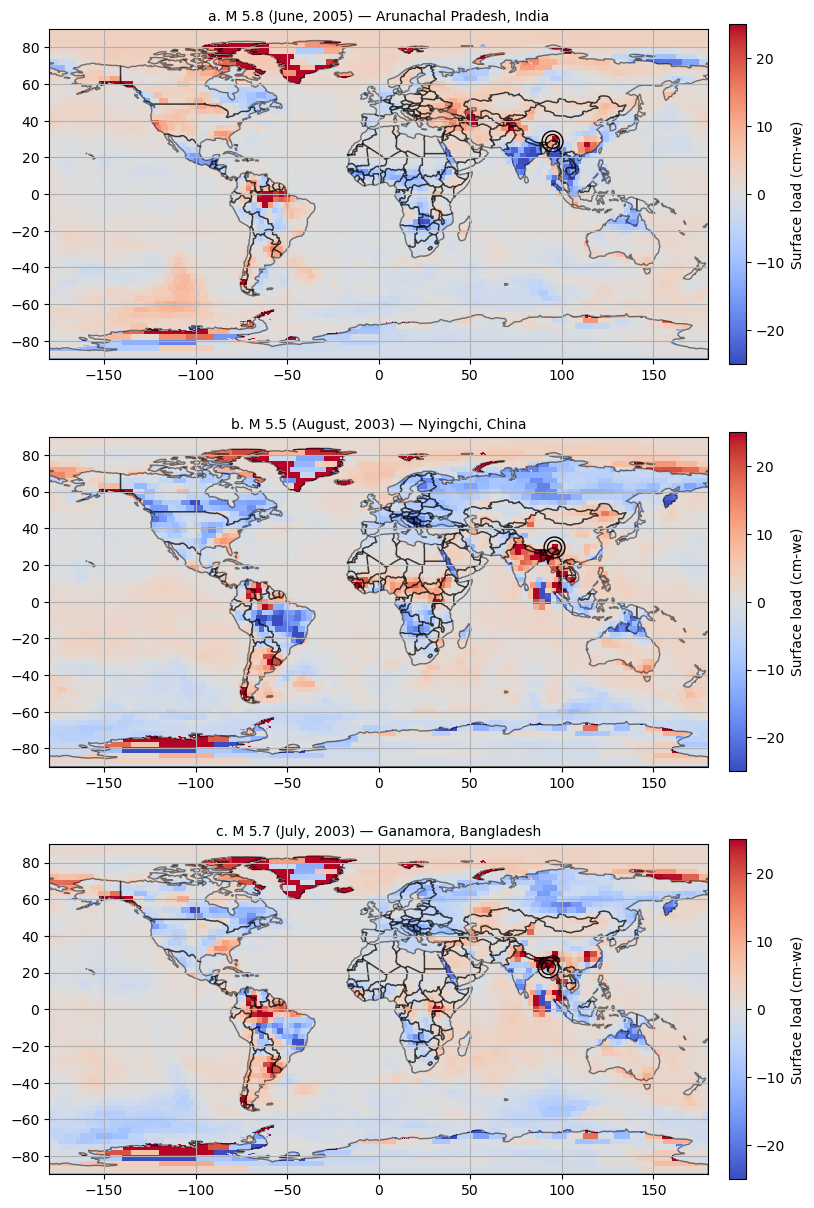

In [70]:
plt.style.use('default')

fig,((ax1),(ax2),(ax3)) = plt.subplots(3,1, figsize=(9,15))
grace_snapshot(28.8810,94.6260,'a. M 5.8 (June, 2005) — Arunachal Pradesh, India',10,snapshot1,ax1,True,'right',pad=0.03,fract=0.025)
grace_snapshot(29.5730,95.6050,'b. M 5.5 (August, 2003) — Nyingchi, China',10,snapshot2,ax2,True,'right',pad=0.03,fract=0.025)
grace_snapshot(22.8540,92.3060,'c. M 5.7 (July, 2003) — Ganamora, Bangladesh',10, snapshot3,ax3,True,'right',pad=0.03,fract=0.025)

## Events with biggest loading & unloading

In [14]:
'''
(a) Event with biggest unloading (dmass = -43.1)

location: Caspian Sea, in between Azerbajian and Turkmenistan
'''

ds.sel(time='2014-06-07T12:00:00.000000000', method="nearest")

<xarray.Dataset>
Dimensions:        (lon: 720, lat: 360, bounds: 2)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
    time           datetime64[ns] 2014-06-13
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (lat, lon) float64 5.197 5.197 5.197 5.197 ... 4.08 4.08 4.08
    uncertainty    (lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 -90.0 -89.5 -89.5 ... 89.5 89.5 90.0
    lon_bounds     (lon, bounds) float64 0.0 0.5 0.5 1.0 ... 359.5 359.5 360.0
    time_bounds    (bounds) datetime64[ns] ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06Mv2 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2022-03-08T07:03:58Z

In [15]:
index = np.where(dataset == np.datetime64('2014-06-13'))
print(index)
unload1 = ds.lwe_thickness.to_numpy()[index,:,:].squeeze()

(array([135]),)


## Notes:

- The event with second biggest unloading (dmass = -34.5) was in Nyingchi, China but there is no data in nov 2017. Closest dates are 2018-06-16 and 2017-06-11
- The event with third biggest unloading (dmass = -31.5) occurred in Durrës District, Albania but USGS revised the magnitude so it is now < 5.4


In [16]:
'''
(b) Event with fourth biggest unloading (dmass = -21.58)

location: Dahlak Archipelago, Red Sea
'''

ds.sel(time='2013-07-08T12:00:00.000000000', method="nearest")

<xarray.Dataset>
Dimensions:        (lon: 720, lat: 360, bounds: 2)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
    time           datetime64[ns] 2013-07-16T12:00:00
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (lat, lon) float64 3.017 3.017 3.017 ... 4.713 4.713 4.713
    uncertainty    (lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 -90.0 -89.5 -89.5 ... 89.5 89.5 90.0
    lon_bounds     (lon, bounds) float64 0.0 0.5 0.5 1.0 ... 359.5 359.5 360.0
    time_bounds    (bounds) datetime64[ns] ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06Mv2 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2022-03-08T07:03:58Z

In [17]:
index = np.where(dataset == np.datetime64('2013-07-16T12:00:00'))
print(index)
unload2 = ds.lwe_thickness.to_numpy()[index,:,:].squeeze()

(array([127]),)


In [18]:
'''
Event with biggest loading (dmass = 46)

location: Minziro, Tanzania
'''

ds.sel(time='2016-09-10T12:00:00.000000000', method="nearest")

<xarray.Dataset>
Dimensions:        (lon: 720, lat: 360, bounds: 2)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
    time           datetime64[ns] 2016-08-21T12:00:00
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (lat, lon) float64 8.371 8.371 8.371 ... 1.541 1.541 1.541
    uncertainty    (lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 -90.0 -89.5 -89.5 ... 89.5 89.5 90.0
    lon_bounds     (lon, bounds) float64 0.0 0.5 0.5 1.0 ... 359.5 359.5 360.0
    time_bounds    (bounds) datetime64[ns] ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06Mv2 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2022-03-08T07:03:58Z

In [23]:
index = np.where(dataset == np.datetime64('2016-08-21T12:00:00'))
print(index)
load1 = ds.lwe_thickness.to_numpy()[156,:,:].squeeze()

(array([155]),)


In [24]:
'''
Event with second biggest loading (dmass = 32)

location: Nyingchi, China
'''

ds.sel(time='2003-08-18T12:00:00.000000000', method="nearest")

<xarray.Dataset>
Dimensions:        (lon: 720, lat: 360, bounds: 2)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
    time           datetime64[ns] 2003-08-16T12:00:00
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (lat, lon) float64 -0.603 -0.603 -0.603 ... 1.551 1.551 1.551
    uncertainty    (lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 -90.0 -89.5 -89.5 ... 89.5 89.5 90.0
    lon_bounds     (lon, bounds) float64 0.0 0.5 0.5 1.0 ... 359.5 359.5 360.0
    time_bounds    (bounds) datetime64[ns] ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06Mv2 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2022-03-08T07:03:58Z

In [25]:
index = np.where(dataset == np.datetime64('2003-08-16T12:00:00'))
print(index)
load2 = ds.lwe_thickness.to_numpy()[index,:,:].squeeze()

(array([13]),)


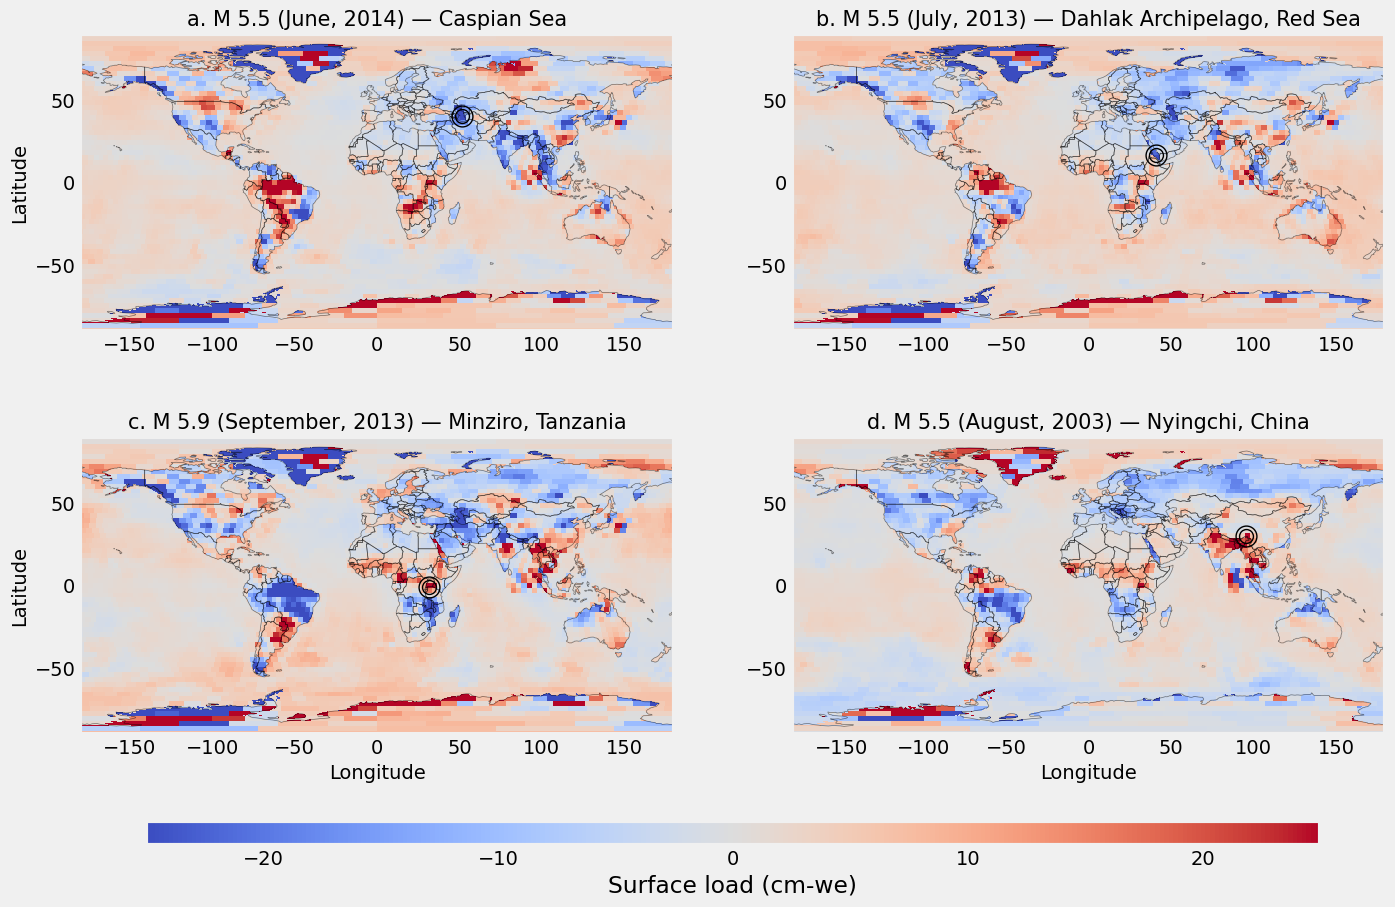

In [139]:
plt.style.use('fivethirtyeight')

fig,ax=plt.subplots(2,2,figsize=(15,12))
(((ax1),(ax2)),((ax3),(ax4)))=ax

grace_snapshot(40.3731,51.5739,'a. M 5.5 (June, 2014) — Caspian Sea',15,unload1,ax1,
               False,'right',pad=0.03,fract=0.025)
grace_snapshot(16.7070,40.8310,'b. M 5.5 (July, 2013) — Dahlak Archipelago, Red Sea',15,unload2,ax2,
               False,'right',pad=0.03,fract=0.025)
grace_snapshot(-1.0355,31.6181,'c. M 5.9 (September, 2013) — Minziro, Tanzania',15,load1,ax3,
               False,'right',pad=0.03,fract=0.025)
grace_snapshot(29.5730,95.6050,'d. M 5.5 (August, 2003) — Nyingchi, China',15,load2,ax4,
               False,'right',pad=0.03,fract=0.025)

ax1.set_ylabel('Latitude',fontsize=14)
ax3.set_ylabel('Latitude',fontsize=14)
ax4.set_xlabel('Longitude',fontsize=14)
ax3.set_xlabel('Longitude',fontsize=14)

# # world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# # world.plot(color='none', edgecolor='black',ax=ax,alpha=0.5)
# vm=25

# lonshift = np.array(ds.lon)
# lonshift[lonshift>180] = lonshift[lonshift>180] - 360
# lat = np.array(ds.lat)
# c=ax1.pcolormesh(fftshift(lonshift),lat,fftshift(snapshot,axes=1),vmin=-vm,vmax=vm,cmap='coolwarm')

plt.colorbar(c, ax=ax, label='Surface load (cm-we)',
             aspect=50,
             pad=0.09,
             shrink=0.9,
             location='bottom')
plt.show()

In [50]:
ds

<xarray.Dataset>
Dimensions:        (lon: 720, lat: 360, time: 205, bounds: 2)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time           (time) datetime64[ns] 2002-04-17T12:00:00 ... 2022-01-16T1...
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (time, lat, lon) float64 -4.04 -4.04 -4.04 ... 3.263 3.263
    uncertainty    (time, lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 -90.0 -89.5 -89.5 ... 89.5 89.5 90.0
    lon_bounds     (lon, bounds) float64 0.0 0.5 0.5 1.0 ... 359.5 359.5 360.0
    time_bounds    (time, bounds) datetime64[ns] ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06Mv2 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2022-03-08T07:03:58Z